In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
%matplotlib inline

The idea of Ridge regression is to simply penalize too high weights (avoid the weight explosion)

In [6]:
X = np.linspace(-2, 2, 100).reshape(-1,1)
Y = 1.5 * X + 5.
y = Y + np.random.randn(len(X)).reshape(-1,1)

LinearRegression : y = 1.52*x + 4.84
Ridge alpha=1.0 : y = 1.51*x + 4.84
Ridge alpha=10.0 : y = 1.42*x + 4.84
Lasso alpha=1.0 : y = 0.79*x + 4.84
Lasso alpha=10.0 : y = 0.0*x + 4.84


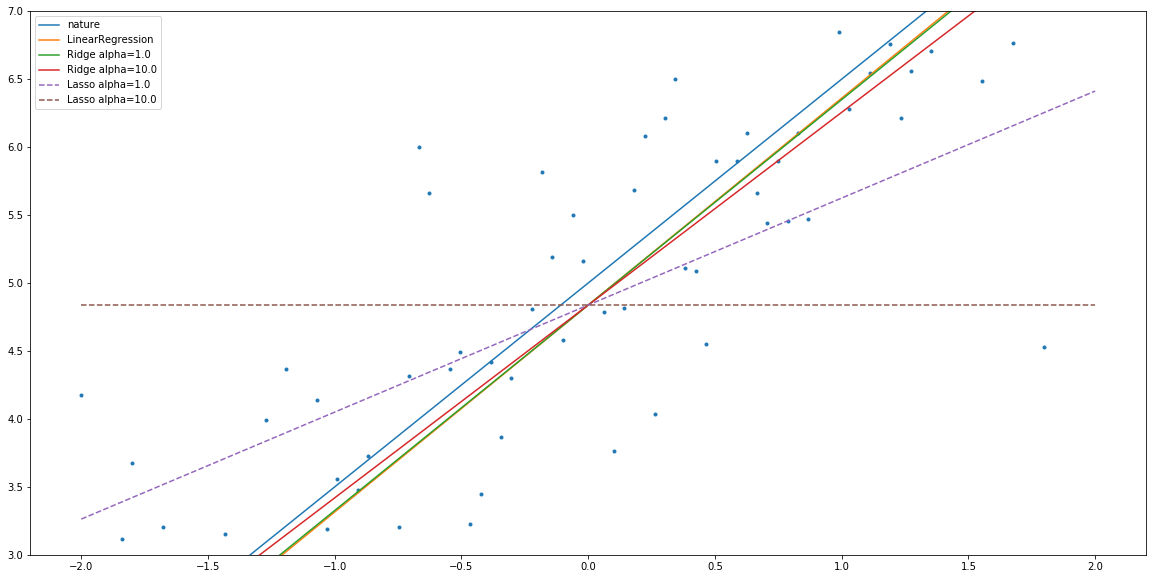

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(X, y, marker='.')
plt.plot(X, Y, label='nature')

for regressor in [LinearRegression(), Ridge(alpha=1.), Ridge(alpha=10.), Lasso(alpha=1.), Lasso(alpha=10.)]:
    name = regressor.__class__.__name__
    regressor.fit(X, y)
    w0, w1 = regressor.intercept_, regressor.coef_
    
    if not isinstance(regressor, LinearRegression):
        name = name + f' alpha={regressor.alpha}'
        
    style = '--' if isinstance(regressor, Lasso) else '-'

        
    print(f'{name} : y = {round(float(w1),2)}*x + {round(float(w0),2)}')
    plt.plot(X, w1 * X + w0, label=name, ls=style)

plt.ylim(3,7)
plt.legend()